In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")


In [7]:
data= pd.read_csv("zomato.csv")
data

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


# EDA

In [3]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [8]:
data.tail()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


In [9]:
# unique_rates = data['rate'].unique()
# print(unique_rates)
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [10]:
data.mode() #tell us the most reucurring value

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/24-7RestaurantBangalore...,Delivery Only,Cafe Coffee Day,Yes,No,NEW,0.0,080 43334321,BTM,Quick Bites,Biryani,North Indian,300,[],[],Delivery,BTM
1,https://www.zomato.com/24-7RestaurantBangalore...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.zomato.com/29degreesnorth?context=...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.zomato.com/29degreesnorth?context=...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.zomato.com/29degreesnorth?context=...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/umashomefood?context=ey...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51713,https://www.zomato.com/zyksha-food-truck?conte...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51714,https://www.zomato.com/zyksha-food-truck?conte...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51715,https://www.zomato.com/zyksha-food-truck?conte...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [12]:
[features for features in data.columns if data[features].isnull().sum()>0 ]

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [13]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [15]:
data.max

<bound method NDFrame._add_numeric_operations.<locals>.max of                                                      url  \
0      https://www.zomato.com/bangalore/jalsa-banasha...   
1      https://www.zomato.com/bangalore/spice-elephan...   
2      https://www.zomato.com/SanchurroBangalore?cont...   
3      https://www.zomato.com/bangalore/addhuri-udupi...   
4      https://www.zomato.com/bangalore/grand-village...   
...                                                  ...   
51712  https://www.zomato.com/bangalore/best-brews-fo...   
51713  https://www.zomato.com/bangalore/vinod-bar-and...   
51714  https://www.zomato.com/bangalore/plunge-sherat...   
51715  https://www.zomato.com/bangalore/chime-sherato...   
51716  https://www.zomato.com/bangalore/the-nest-the-...   

                                                 address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical Col

In [16]:
data.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [17]:
data['address'].value_counts()

address
Delivery Only                                                                               128
14th Main, 4th Sector, HSR, Bangalore                                                        71
The Ritz-Carlton, 99, Residency Road, Bangalore                                              61
Citrus Hotels, 34, Cunningham Road, Bangalore                                                53
Conrad Bengaluru, Kensington Road, Ulsoor, Bangalore                                         49
                                                                                           ... 
9/53, Near Kanti Sweets, 5th Main Road, Ganganagar, RT Nagar, Bangalore                       1
94 Neeladri Nagar, 14th Cross Neeladri Main Road, Doddatogur, Electronic City, Bangalore      1
12, Rahmathnagar Bus Stop, RT Nagar, Bangalore                                                1
SJR Equinox, Opposite Velankani Gate 3, Phase1, Electronic City, Bangalore                    1
B K Rama Reddy, Virat Nagar Circ

In [18]:
data.min

<bound method NDFrame._add_numeric_operations.<locals>.min of                                                      url  \
0      https://www.zomato.com/bangalore/jalsa-banasha...   
1      https://www.zomato.com/bangalore/spice-elephan...   
2      https://www.zomato.com/SanchurroBangalore?cont...   
3      https://www.zomato.com/bangalore/addhuri-udupi...   
4      https://www.zomato.com/bangalore/grand-village...   
...                                                  ...   
51712  https://www.zomato.com/bangalore/best-brews-fo...   
51713  https://www.zomato.com/bangalore/vinod-bar-and...   
51714  https://www.zomato.com/bangalore/plunge-sherat...   
51715  https://www.zomato.com/bangalore/chime-sherato...   
51716  https://www.zomato.com/bangalore/the-nest-the-...   

                                                 address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical Col

In [19]:
data.max

<bound method NDFrame._add_numeric_operations.<locals>.max of                                                      url  \
0      https://www.zomato.com/bangalore/jalsa-banasha...   
1      https://www.zomato.com/bangalore/spice-elephan...   
2      https://www.zomato.com/SanchurroBangalore?cont...   
3      https://www.zomato.com/bangalore/addhuri-udupi...   
4      https://www.zomato.com/bangalore/grand-village...   
...                                                  ...   
51712  https://www.zomato.com/bangalore/best-brews-fo...   
51713  https://www.zomato.com/bangalore/vinod-bar-and...   
51714  https://www.zomato.com/bangalore/plunge-sherat...   
51715  https://www.zomato.com/bangalore/chime-sherato...   
51716  https://www.zomato.com/bangalore/the-nest-the-...   

                                                 address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical Col

In [20]:
data.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [21]:
data.nunique()

url                            51717
address                        11495
name                            8792
online_order                       2
book_table                         2
rate                              64
votes                           2328
phone                          14926
location                          93
rest_type                         93
dish_liked                      5271
cuisines                        2723
approx_cost(for two people)       70
reviews_list                   22513
menu_item                       9098
listed_in(type)                    7
listed_in(city)                   30
dtype: int64

In [22]:
data.shape

(51717, 17)

In [23]:
ratings = data.groupby(['rate', 'online_order', 'book_table']).size().reset_index().rename(columns={0: 'Rating Count'})
ratings
#containing the count of ratings for each combination of 'Aggregate rating', 'Rating color', and 'Rating text' in
#your dataset data. Adjust the column 
#names accordingly if they are different in your actual dataset.


,rate,online_order,book_table,Rating Count
0,-,No,No,63
1,-,Yes,No,6
2,1.8 /5,No,No,3
3,1.8/5,No,No,2
4,2.0 /5,No,No,7
...,...,...,...,...
202,4.9/5,Yes,Yes,10
203,NEW,No,No,1025
204,NEW,No,Yes,87
205,NEW,Yes,No,1054


In [24]:
ratings.head()

,rate,online_order,book_table,Rating Count
0,-,No,No,63
1,-,Yes,No,6
2,1.8 /5,No,No,3
3,1.8/5,No,No,2
4,2.0 /5,No,No,7


In [25]:
data.duplicated().sum()

0

In [26]:
data.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

# dropping unessecary columns

In [27]:
data.drop(columns=['url'],inplace=True)

In [28]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,51707,51708,51709,51710,51711,51712,51713,51714,51715,51716
address,"942, 21st Main Road, 2nd Stage, Banashankari, ...","2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...","1112, Next to KIMS Medical College, 17th Cross...","1st Floor, Annakuteera, 3rd Stage, Banashankar...","10, 3rd Floor, Lakshmi Associates, Gandhi Baza...","37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...","19/1, New Timberyard Layout, Beside Satellite ...","2469, 3rd Floor, 24th Cross, Opposite BDA Comp...","1, 30th Main Road, 3rd Stage, Banashankari, Ba...","2470, 21 Main Road, 25th Cross, Banashankari, ...",...,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...","Keys Hotel, 6, 1st Phase Industrial Area, Near...","136, SAP Labs India, KIADB Export Promotion In...","2E2, 4th Cross Road, Devasandra Industrial Est...","139/C1, Next To GR Tech Park, Pattandur Agraha...","Four Points by Sheraton Bengaluru, 43/3, White...","Number 10, Garudachar Palya, Mahadevapura, Whi...",Sheraton Grand Bengaluru Whitefield Hotel & Co...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,"ITPL Main Road, KIADB Export Promotion Industr..."
name,Jalsa,Spice Elephant,San Churro Cafe,Addhuri Udupi Bhojana,Grand Village,Timepass Dinner,Rosewood International Hotel - Bar & Restaurant,Onesta,Penthouse Cafe,Smacznego,...,M Bar - Bengaluru Marriott Hotel Whitefield,Keys Cafe - Keys Hotel,The Farm House Bar n Grill,Topsy Turvey,Bhagini,Best Brews - Four Points by Sheraton Bengaluru...,Vinod Bar And Restaurant,Plunge - Sheraton Grand Bengaluru Whitefield H...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,The Nest - The Den Bengaluru
online_order,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,...,No,No,No,No,No,No,No,No,No,No
book_table,Yes,No,No,No,No,No,No,Yes,No,No,...,No,No,No,No,No,No,No,No,Yes,No
rate,4.1/5,4.1/5,3.8/5,3.7/5,3.8/5,3.8/5,3.6/5,4.6/5,4.0/5,4.2/5,...,3.9 /5,2.8 /5,3.7 /5,NaN,2.5 /5,3.6 /5,NaN,NaN,4.3 /5,3.4 /5
votes,775,787,918,88,166,286,8,2556,324,504,...,77,161,34,0,81,27,0,0,236,13
phone,080 42297555\r\n+91 9743772233,080 41714161,+91 9663487993,+91 9620009302,+91 8026612447\r\n+91 9901210005,+91 9980040002\r\n+91 9980063005,+91 9731716688\r\n080 26740366,080 48653961\r\n080 48655715,+91 8884135549\r\n+91 9449449316,+91 9945230807\r\n+91 9743804471,...,080 49435000,080 39451000\n+91 8884038484,+91 9980121279\n+91 9900240646,+91 9148155994,080 65951222,080 40301477,+91 8197675843,NaN,080 49652769,+91 8071117272
location,Banashankari,Banashankari,Banashankari,Banashankari,Basavanagudi,Basavanagudi,Mysore Road,Banashankari,Banashankari,Banashankari,...,Whitefield,Whitefield,Whitefield,Whitefield,Whitefield,Whitefield,Whitefield,Whitefield,"ITPL Main Road, Whitefield","ITPL Main Road, Whitefield"
rest_type,Casual Dining,Casual Dining,"Cafe, Casual Dining",Quick Bites,Casual Dining,Casual Dining,Casual Dining,"Casual Dining, Cafe",Cafe,Cafe,...,"Fine Dining, Bar","Casual Dining, Bar","Casual Dining, Bar",Bar,"Casual Dining, Bar",Bar,Bar,Bar,Bar,"Bar, Casual Dining"
dish_liked,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Churros, Cannelloni, Minestrone Soup, Hot Choc...",Masala Dosa,"Panipuri, Gol Gappe","Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",NaN,"Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...",...,Rooftop Ambience,"Salads, Coffee, Breakfast Buffet, Halwa, Chick...",NaN,NaN,"Biryani, Andhra Meal",NaN,NaN,NaN,"Cocktails, Pizza, Buttermilk",NaN


In [29]:
len(data[data['menu_item'] == '[]'])
# checked the length of entries where 'menu_item' is empty ([]).

39617

In [30]:
len(data)

51717

In [31]:
data.drop(columns=['reviews_list','menu_item'],inplace=True)

In [32]:
data.drop_duplicates()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500",Pubs and bars,Whitefield
51713,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,Pubs and bars,Whitefield
51714,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",Pubs and bars,Whitefield
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500",Pubs and bars,Whitefield


In [33]:
data.shape

(51717, 14)

In [34]:
threshold=49
# set a threshold value of 49
names = data['address'].value_counts().index
#extracted names and values of addresses that appear equal to or more than the threshold

In [35]:
values = data['address'].value_counts().values

In [36]:
values = [names[i] for i in range(len(values)) if values[i] >= 49]
#So, in summary, this line of code is filtering out values from the list names based on a condition 
#(values greater than or equal to 49) from
#another list values, and storing the filtered values in a new list called values

In [37]:
data['address'].value_counts()

address
Delivery Only                                                                               128
14th Main, 4th Sector, HSR, Bangalore                                                        71
The Ritz-Carlton, 99, Residency Road, Bangalore                                              61
Citrus Hotels, 34, Cunningham Road, Bangalore                                                53
Conrad Bengaluru, Kensington Road, Ulsoor, Bangalore                                         49
                                                                                           ... 
9/53, Near Kanti Sweets, 5th Main Road, Ganganagar, RT Nagar, Bangalore                       1
94 Neeladri Nagar, 14th Cross Neeladri Main Road, Doddatogur, Electronic City, Bangalore      1
12, Rahmathnagar Bus Stop, RT Nagar, Bangalore                                                1
SJR Equinox, Opposite Velankani Gate 3, Phase1, Electronic City, Bangalore                    1
B K Rama Reddy, Virat Nagar Circ

In [38]:
values

['Delivery Only',
 '14th Main, 4th Sector, HSR, Bangalore',
 'The Ritz-Carlton, 99, Residency Road, Bangalore',
 'Citrus Hotels, 34, Cunningham Road, Bangalore',
 'Conrad Bengaluru, Kensington Road, Ulsoor, Bangalore']

In [39]:
address = np.array(data['address'])
address = [address[i] if address[i] in values else 'other' for i in range(len(address))]
# replaces certain values in the 'address' column of the 
#DataFrame with 'other' based on a condition and updates the 'address' column with the modified values.

In [40]:
address = pd.DataFrame(address)
data['address'] = address

In [41]:
data['address'].value_counts()

address
other                                                   51355
Delivery Only                                             128
14th Main, 4th Sector, HSR, Bangalore                      71
The Ritz-Carlton, 99, Residency Road, Bangalore            61
Citrus Hotels, 34, Cunningham Road, Bangalore              53
Conrad Bengaluru, Kensington Road, Ulsoor, Bangalore       49
Name: count, dtype: int64

In [42]:
columns = ['name','location','rest_type','dish_liked','cuisines','listed_in(city)']
threshold = [70,2144,2263,57,911,2371]
for i in range(len(columns)):
    names = data[columns[i]].value_counts().index
    values = data[columns[i]].value_counts().values
    values = [names[k] for k in range(len(values)) if values[k] >= threshold[i]]
    address = np.array(data[columns[i]])
    address = [address[j] if address[j] in values else 'other' for j in range(len(address))]
    #It replaces values in the address array with 'other' if they are not present in 
    #the filtered list of relevant values obtained in the previous step
    address = pd.DataFrame(address)
    data[columns[i]] = address

In [43]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,51707,51708,51709,51710,51711,51712,51713,51714,51715,51716
address,other,other,other,other,other,other,other,other,other,other,...,other,other,other,other,other,other,other,other,other,other
name,other,other,other,other,other,other,other,Onesta,other,other,...,other,other,other,other,other,other,other,other,other,other
online_order,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,...,No,No,No,No,No,No,No,No,No,No
book_table,Yes,No,No,No,No,No,No,Yes,No,No,...,No,No,No,No,No,No,No,No,Yes,No
rate,4.1/5,4.1/5,3.8/5,3.7/5,3.8/5,3.8/5,3.6/5,4.6/5,4.0/5,4.2/5,...,3.9 /5,2.8 /5,3.7 /5,NaN,2.5 /5,3.6 /5,NaN,NaN,4.3 /5,3.4 /5
votes,775,787,918,88,166,286,8,2556,324,504,...,77,161,34,0,81,27,0,0,236,13
phone,080 42297555\r\n+91 9743772233,080 41714161,+91 9663487993,+91 9620009302,+91 8026612447\r\n+91 9901210005,+91 9980040002\r\n+91 9980063005,+91 9731716688\r\n080 26740366,080 48653961\r\n080 48655715,+91 8884135549\r\n+91 9449449316,+91 9945230807\r\n+91 9743804471,...,080 49435000,080 39451000\n+91 8884038484,+91 9980121279\n+91 9900240646,+91 9148155994,080 65951222,080 40301477,+91 8197675843,NaN,080 49652769,+91 8071117272
location,other,other,other,other,other,other,other,other,other,other,...,Whitefield,Whitefield,Whitefield,Whitefield,Whitefield,Whitefield,Whitefield,Whitefield,other,other
rest_type,Casual Dining,Casual Dining,other,Quick Bites,Casual Dining,Casual Dining,Casual Dining,other,Cafe,Cafe,...,other,other,other,other,other,other,other,other,other,other
dish_liked,other,other,other,other,other,other,other,other,other,other,...,other,other,other,other,other,other,other,other,other,other


In [44]:
data.drop(columns=['phone'],inplace=True)

In [45]:
data.shape

(51717, 13)

In [46]:
len(data[data['rate'] == 'NEW'])

2208

In [47]:
data.dropna(inplace=True)


In [48]:
data.isna().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [49]:
data.drop(data[data['rate'] == 'NEW'].index,inplace=True)

In [50]:
data['rate'].value_counts()

rate
3.9/5     2094
3.7/5     2009
3.8/5     2001
3.9 /5    1867
3.8 /5    1824
          ... 
2.2 /5       7
2.0 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: count, Length: 63, dtype: int64

In [51]:
data.drop(data[data['rate'] == '-'].index,inplace=True)

In [52]:
data['rate'] = data['rate'].str.split('/').str[0].astype(float)
#splits each value in the 'rate' column by '/' character, returning a Series of lists.
#astype(float) converts the extracted rating values to floating-point numbers

In [53]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,51704,51705,51706,51707,51708,51709,51711,51712,51715,51716
address,other,other,other,other,other,other,other,other,other,other,...,other,other,other,other,other,other,other,other,other,other
name,other,other,other,other,other,other,other,Onesta,other,other,...,other,other,other,other,other,other,other,other,other,other
online_order,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,...,No,Yes,No,No,No,No,No,No,No,No
book_table,Yes,No,No,No,No,No,No,Yes,No,No,...,Yes,Yes,No,No,No,No,No,No,Yes,No
rate,4.1,4.1,3.8,3.7,3.8,3.8,3.6,4.6,4.0,4.2,...,4.0,3.8,3.7,3.9,2.8,3.7,2.5,3.6,4.3,3.4
votes,775,787,918,88,166,286,8,2556,324,504,...,189,128,27,77,161,34,81,27,236,13
location,other,other,other,other,other,other,other,other,other,other,...,Whitefield,Whitefield,Whitefield,Whitefield,Whitefield,Whitefield,Whitefield,Whitefield,other,other
rest_type,Casual Dining,Casual Dining,other,Quick Bites,Casual Dining,Casual Dining,Casual Dining,other,Cafe,Cafe,...,other,other,other,other,other,other,other,other,other,other
dish_liked,other,other,other,other,other,other,other,other,other,other,...,other,other,other,other,other,other,other,other,other,other
cuisines,other,other,other,other,other,North Indian,other,other,other,other,...,other,other,other,other,other,other,other,other,other,other


In [54]:
data.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,other,other,Yes,Yes,4.1,775,other,Casual Dining,other,other,800,Buffet,other
1,other,other,Yes,No,4.1,787,other,Casual Dining,other,other,800,Buffet,other
2,other,other,Yes,No,3.8,918,other,other,other,other,800,Buffet,other
3,other,other,No,No,3.7,88,other,Quick Bites,other,other,300,Buffet,other
4,other,other,No,No,3.8,166,other,Casual Dining,other,other,600,Buffet,other


In [55]:
data.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [56]:
data['online_order'] = data['online_order'].map({'Yes' : 1 , 'No': 0})
#mapping

In [57]:
data['book_table'] = data['book_table'].map({'Yes' : 1 , 'No': 0})

In [58]:
ct = ColumnTransformer(
   [
       ('one-hot',OneHotEncoder(), ['name','location','rest_type','dish_liked','cuisines','listed_in(city)'])
   ],
#    OneHotEncoder for categorical variables.
)

In [59]:
transformed = ct.fit_transform(data)

In [60]:
features_names = ct.get_feature_names_out()
features_names
#This line retrieves the feature names of the transformed dataset

array(['one-hot__name_Cafe Coffee Day', 'one-hot__name_Empire Restaurant',
       'one-hot__name_Five Star Chicken', 'one-hot__name_Just Bake',
       'one-hot__name_Onesta', 'one-hot__name_other',
       'one-hot__location_BTM', 'one-hot__location_HSR',
       'one-hot__location_JP Nagar',
       'one-hot__location_Koramangala 5th Block',
       'one-hot__location_Whitefield', 'one-hot__location_other',
       'one-hot__rest_type_Cafe', 'one-hot__rest_type_Casual Dining',
       'one-hot__rest_type_Delivery', 'one-hot__rest_type_Dessert Parlor',
       'one-hot__rest_type_Quick Bites', 'one-hot__rest_type_other',
       'one-hot__dish_liked_Biryani',
       'one-hot__dish_liked_Chicken Biryani',
       'one-hot__dish_liked_Friendly Staff',
       'one-hot__dish_liked_Paratha', 'one-hot__dish_liked_Waffles',
       'one-hot__dish_liked_other', 'one-hot__cuisines_Bakery, Desserts',
       'one-hot__cuisines_Biryani', 'one-hot__cuisines_North Indian',
       'one-hot__cuisines_North Indi

In [61]:
transformed_data = transformed.toarray()
#convert into array

In [62]:
df = pd.DataFrame(transformed_data, columns=features_names)

In [63]:
transformed_data

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [64]:
df

,one-hot__name_Cafe Coffee Day,one-hot__name_Empire Restaurant,one-hot__name_Five Star Chicken,one-hot__name_Just Bake,one-hot__name_Onesta,one-hot__name_other,one-hot__location_BTM,one-hot__location_HSR,one-hot__location_JP Nagar,one-hot__location_Koramangala 5th Block,...,"one-hot__cuisines_North Indian, Chinese",one-hot__cuisines_South Indian,one-hot__cuisines_other,one-hot__listed_in(city)_BTM,one-hot__listed_in(city)_Jayanagar,one-hot__listed_in(city)_Koramangala 4th Block,one-hot__listed_in(city)_Koramangala 5th Block,one-hot__listed_in(city)_Koramangala 6th Block,one-hot__listed_in(city)_Koramangala 7th Block,one-hot__listed_in(city)_other
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41413,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41414,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41415,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41416,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [65]:
data = pd.concat([data,df],axis=1)
#additional transformed features from df

In [66]:
data.drop(columns=['name','location','rest_type','dish_liked','cuisines','listed_in(city)'],inplace=True)

In [67]:
data.dropna(inplace=True)

In [68]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,41406,41407,41409,41410,41411,41412,41413,41414,41415,41417
address,other,other,other,other,other,other,other,other,other,other,...,other,other,other,other,other,other,other,other,other,other
online_order,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
book_table,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
rate,4.1,4.1,3.8,3.7,3.8,3.8,3.6,4.6,4.0,4.2,...,3.8,2.9,3.0,4.1,4.0,3.5,3.4,3.2,3.5,3.6
votes,775.0,787.0,918.0,88.0,166.0,286.0,8.0,2556.0,324.0,504.0,...,47.0,253.0,384.0,266.0,2834.0,11.0,4.0,19.0,10.0,33.0
approx_cost(for two people),800,800,800,300,600,600,800,600,700,550,...,300,400,"1,000","1,000","1,100",400,300,400,400,500
listed_in(type),Buffet,Buffet,Buffet,Buffet,Buffet,Buffet,Buffet,Cafes,Cafes,Cafes,...,Delivery,Delivery,Delivery,Delivery,Delivery,Delivery,Delivery,Delivery,Delivery,Delivery
one-hot__name_Cafe Coffee Day,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
one-hot__name_Empire Restaurant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
one-hot__name_Five Star Chicken,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
data['listed_in(type)'].value_counts()

listed_in(type)
Delivery              17126
Dine-out              10808
Desserts               2092
Cafes                  1229
Drinks & nightlife      758
Buffet                  663
Pubs and bars           445
Name: count, dtype: int64

In [70]:
ohe2 = OneHotEncoder()
trf1 = ohe2.fit_transform(data[['address']])
trf1 = trf1.toarray()
names = ohe2.get_feature_names_out(['address'])
df = pd.DataFrame(trf1,columns=names)
# transformed the 'address' column using this new OneHotEncoder object and converted the result to a dense array.

In [71]:
ohe3 = OneHotEncoder()
trf = ohe3.fit_transform(data[['listed_in(type)']])
trf = trf.toarray()
names = ohe3.get_feature_names_out(['listed_in(type)'])
df2 = pd.DataFrame(trf,columns=names)

In [72]:
data = pd.concat([data,df,df2],axis=1)

In [73]:
data.drop(columns=['address','listed_in(type)'],inplace=True)


In [74]:
data.dropna(inplace=True)

In [75]:
data.T


,0,1,2,3,4,5,6,7,8,9,...,33110,33111,33112,33113,33115,33116,33117,33118,33119,33120
online_order,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
book_table,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rate,4.1,4.1,3.8,3.7,3.8,3.8,3.6,4.6,4.0,4.2,...,2.5,3.1,3.4,3.8,3.8,3.7,3.4,3.7,4.1,3.3
votes,775.0,787.0,918.0,88.0,166.0,286.0,8.0,2556.0,324.0,504.0,...,66.0,6.0,50.0,254.0,75.0,52.0,30.0,47.0,157.0,7.0
approx_cost(for two people),800,800,800,300,600,600,800,600,700,550,...,350,600,300,600,200,150,500,800,300,500
one-hot__name_Cafe Coffee Day,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
one-hot__name_Empire Restaurant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
one-hot__name_Five Star Chicken,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
one-hot__name_Just Bake,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
one-hot__name_Onesta,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
data.sample(5)

,online_order,book_table,rate,votes,approx_cost(for two people),one-hot__name_Cafe Coffee Day,one-hot__name_Empire Restaurant,one-hot__name_Five Star Chicken,one-hot__name_Just Bake,one-hot__name_Onesta,...,address_Delivery Only,"address_The Ritz-Carlton, 99, Residency Road, Bangalore",address_other,listed_in(type)_Buffet,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
3326,0.0,0.0,2.9,34.0,750,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
18952,1.0,0.0,3.4,9.0,350,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22742,1.0,0.0,3.1,140.0,600,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26966,1.0,0.0,3.3,8.0,250,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30055,1.0,0.0,3.5,8.0,200,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Check for weak dimensions

In [77]:
# data['approx_cost(for two people)'] = data['approx_cost(for two people)'].str.replace(',', '').astype(int)

In [78]:
columns=['one-hot__location_other','one-hot__dish_liked_Chicken Biryani','one-hot__listed_in(city)_other','address_Conrad Bengaluru, Kensington Road, Ulsoor, Bangalore']
data.drop(columns=columns,inplace=True)

In [79]:
data.shape

(26443, 51)

# Model Training

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

In [81]:
# numerical_columns = ['approx_cost(for two people)']  # Add other numerical columns if needed
# for column in numerical_columns:
#     data[column] = data[column].str.replace(',', '')

# # Convert numerical columns to float
# data[numerical_columns] = data[numerical_columns].astype(float)


In [82]:
X = data.drop(columns=['rate'])
y = data['rate']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [84]:
lr = LinearRegression()
lr.fit(X_train, y_train)


ValueError: could not convert string to float: '1,100'

In [89]:
y_preds = lr.predict(X_test)

In [90]:
predictions = lr.predict(X_test)

In [91]:
mean_squared_error(y_test,y_preds)

0.1398481324917542

In [92]:
lr.score(X_train,y_train)

0.2801464890360298

In [93]:
clr = DecisionTreeRegressor()
clr.fit(X_train,y_train)

DecisionTreeRegressor()

In [94]:
clr.score(X_train,y_train)
#the performence of data set

0.9831617238088627

In [95]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_preds)
print("R-squared Score:", r2)


R-squared Score: 0.2675294519581396


In [96]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 0.37396274211711816


# data visulization

<Axes: >

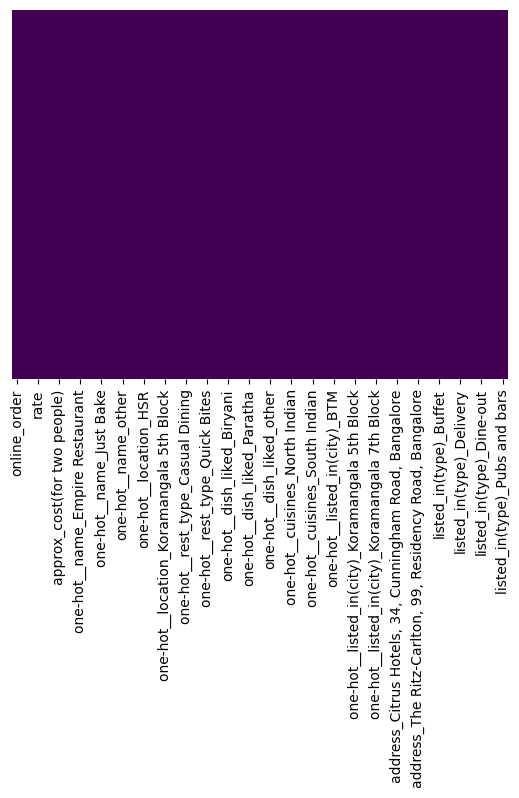

In [97]:
import seaborn as sns
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

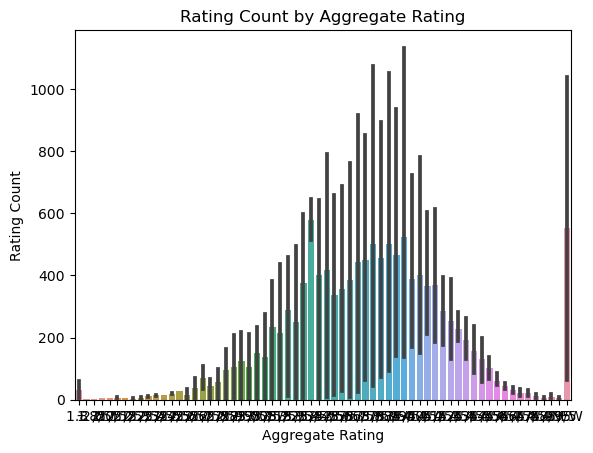

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting
sns.barplot(x="rate", y="Rating Count", data=ratings)
plt.title("Rating Count by Aggregate Rating")
plt.xlabel("Aggregate Rating")
plt.ylabel("Rating Count")
plt.show()


<Axes: >

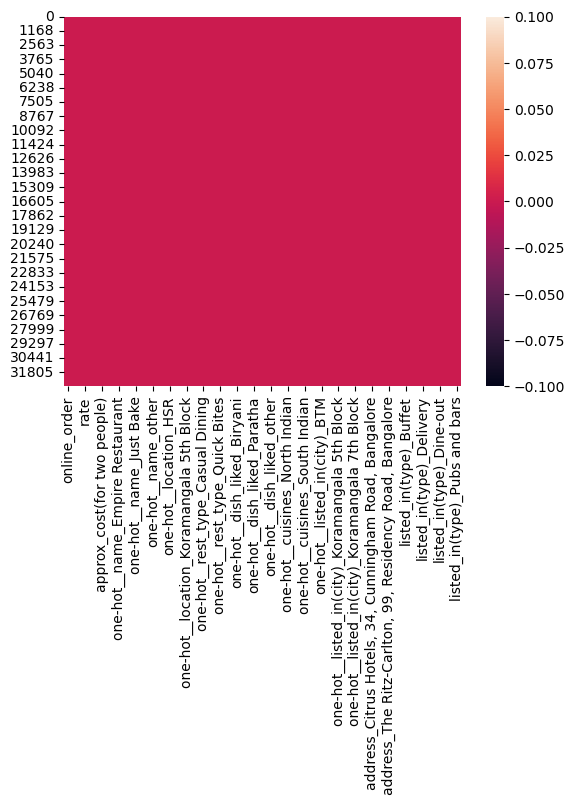

In [99]:
sns.heatmap(data.isnull())

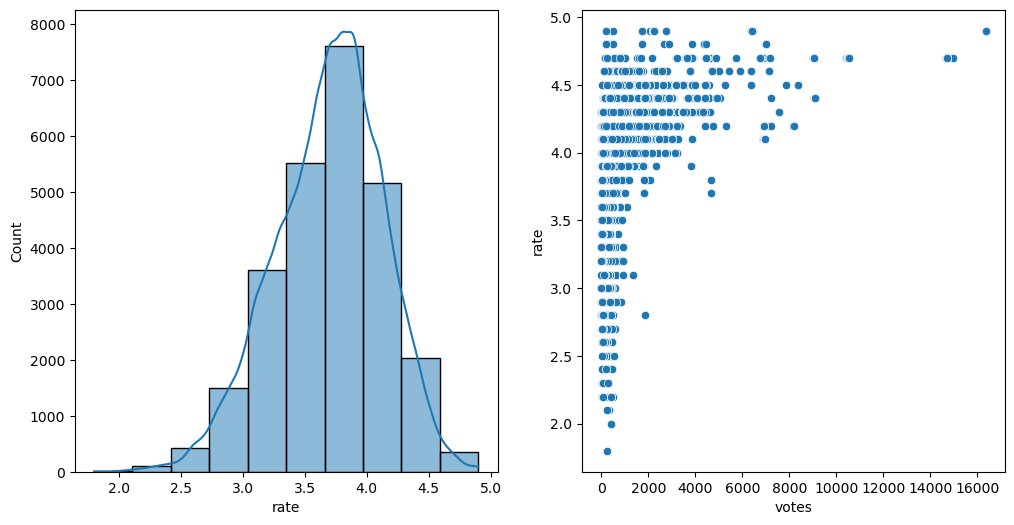

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 6))
sns.histplot(data=data, x='rate', bins=10, kde=True, ax=ax[0])  # Replace 'correct_column_name' with the actual column name
sns.scatterplot(data=data, x='votes', y='rate', ax=ax[1])  # Replace 'correct_column_name' with the actual column name
plt.show()
##lets check the relation between rating abd votes so that it could help us to impute the missing values in rating


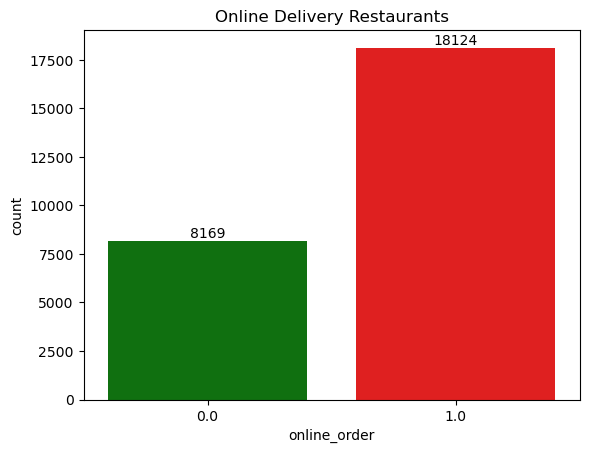

Inference - Approximately 30000 restaurants deliver food online.


In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# Restaurants delivering Online or not
ax = sns.countplot(data=data, x='online_order', palette=['green', 'red'])
ax.bar_label(ax.containers[0])  # Add labels to the bars
plt.title("Online Delivery Restaurants")
plt.show()

print("Inference - Approximately 30000 restaurants deliver food online.")


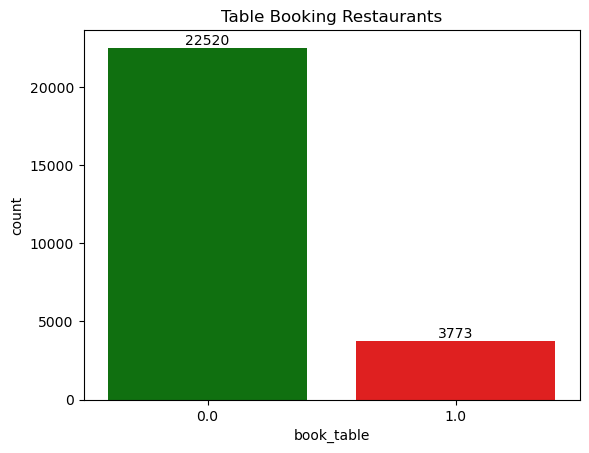

Inference - Approximately 6000 restaurants allow table booking.


In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Restaurants allowing table booking or not
ax1 = sns.countplot(data=data, x='book_table', palette=['green', 'red'])
ax1.bar_label(ax1.containers[0])  # Add labels to the bars
plt.title("Table Booking Restaurants")
plt.show()

print("Inference - Approximately 6000 restaurants allow table booking.")


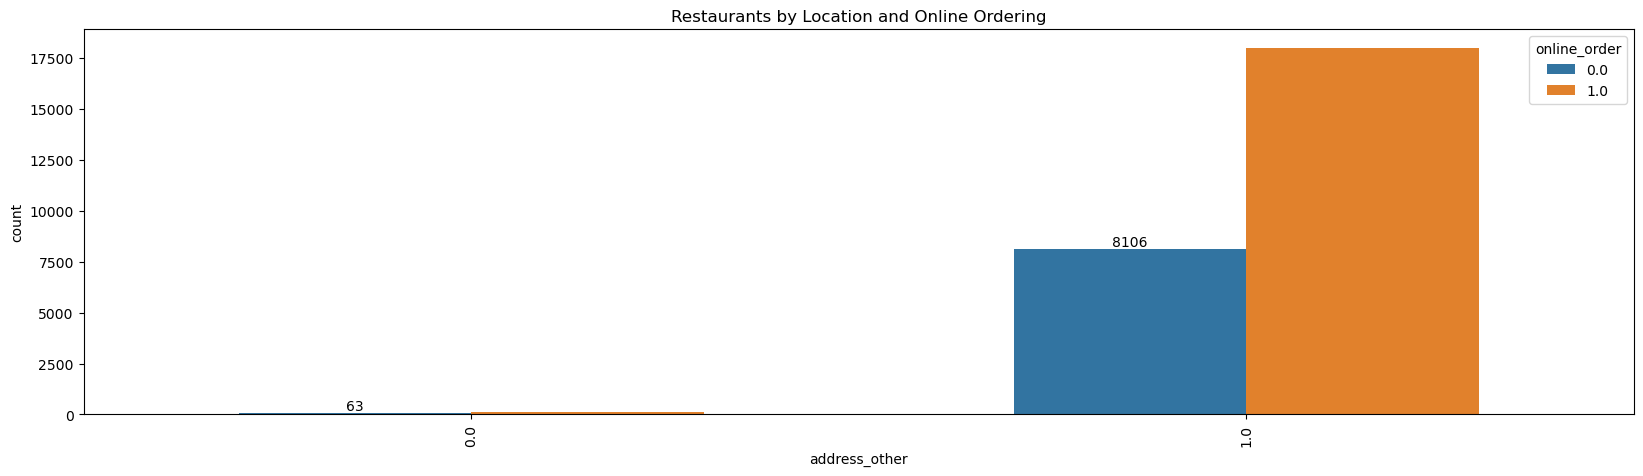

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# Best Location
plt.figure(figsize=(20, 5))
ax1 = sns.countplot(data=data, x='address_other', width=0.6, hue='online_order')
ax1.bar_label(ax1.containers[0])  # Add labels to the bars
plt.xticks(rotation=90)
plt.title("Restaurants by Location and Online Ordering")
plt.show()


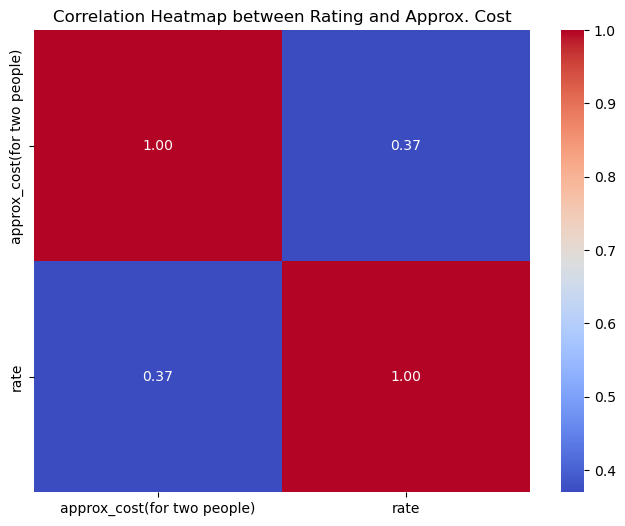

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have two numerical columns: 'approx_cost(for two people)' and 'rate'
# Replace these column names with your actual column names
numerical_columns = ['approx_cost(for two people)', 'rate']

# Calculate correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Rating and Approx. Cost')
plt.show()


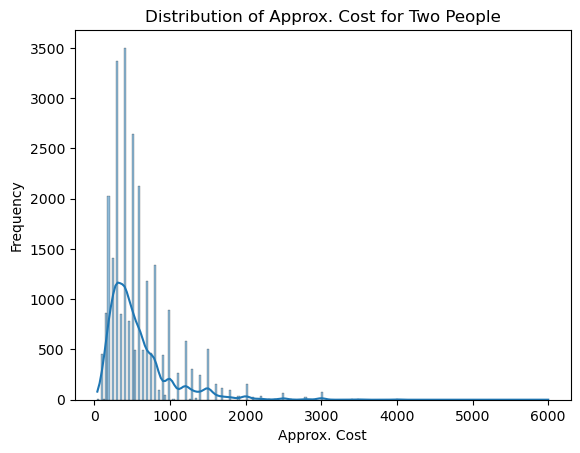

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram
sns.histplot(data['approx_cost(for two people)'], kde=True)
plt.title('Distribution of Approx. Cost for Two People')
plt.xlabel('Approx. Cost')
plt.ylabel('Frequency')
plt.show()